# Dicke model in the ultrastrong coupling regime
When studying nano-materials, it is critical to model the interactions between light and matter.  These interactions are largely governed by the strength of the coupling between optically active quantum nanoparticles which can be described by two level quantum emitters, and light (photons) which can be represented by a bosonic cavity mode.  This type of interaction motivates both the Dicke model and Tavis-Cummings model, which will be outlined below.

##  Models
As described above, the Dicke model describes the interaction between matter and light.  The Dicke Hamiltonian is given by
\begin{equation}
H_D = \hbar \omega_c a^{\dagger} a + \frac{\hbar \omega_o}{2} \sum_{n=1}^{n_s} \left( \sigma^{z}_{n} + I \right) + \hbar \lambda \left( a + a^{\dagger} \right) \sum_{n=1}^{n_s} \left( \sigma^{-}_{n} + \sigma^{+}_{n} \right)
\end{equation}
where $\hbar$ is the reduced planck constant which we will take to be $\hbar = 1$, $a^{\dagger}$ and $a$ are the bosonic creation and annihilation operators respectively, $n_s$ is the number of sites for the two level quantum emitters, $\sigma^{z}_{n}$ is the Pauli Z matrix at site $n$, $\sigma^{\pm}_{n} = \frac{\sigma^{x}_{n} \pm i\sigma^{y}_{n}}{2}$ at site $n$, $\omega_c$ is the cavity photon mode energy, $\omega_o$ is the transition energy of the two level quantum emitters, and $\lambda$ is the coherent quantum exchange rate (i.e. the strength of the coupling between the light and matter).  The interaction terms of the Dicke Model are often considered in two parts: the rotating and counter-rotating terms.  The rotating terms are given by $a^{\dagger}\sigma^{-}_{n} + a\sigma^{+}_{n}$ and the counter-rotating terms are given by $a^{\dagger}\sigma^{+}_{n} + a\sigma^{-}_{n}$.  An approximation can be made where one does not consider the counter-rotating terms.  This motivates the Tavis-Cummings model, described by the Hamiltonian
\begin{equation}
H_{TC} = \hbar \omega_c a^{\dagger} a + \frac{\hbar \omega_o}{2} \sum_{n=1}^{n_s} \left( \sigma^{z}_{n} + I \right) + \hbar \lambda \sum_{n=1}^{n_s} \left( a^{\dagger}\sigma^{-}_{n} + a\sigma^{+}_{n} \right)
\end{equation}

Since both of these models are frequently used in studies of the interaction between light and matter, it is important to be able to compare ground state spectra in the strong coupling regime (non-negligible lambda), where the effect of ignoring the counter-rotating terms is expected to be the most stark.  Classical methods are sufficient for performing these simulations for low cutoff values for the bosonic cavity (~50 bosonic quanta) with 10 spins, however these experiments likely display finite size effects.  To simulate larger systems, a quantum computing approach becomes necessary.  To perform these simulations on a quantum computer, one must first devise an encoding to embed the models onto a quantum device.

## Encoding
Since both the Dicke model and Tavis-Cummings model are motivated by the same interactions, the approach to encoding both models is virtually identical.  To encode the bosonic mode we use a simple, likely non-optimal, one-hot encoding of the bosonic mode.  Since a boson can, in principle, have infinitely many quanta, we must consider a cutoff which we will call $n_b$.  This means that we assume that our bosonic operator may take states $|0\rangle = |\uparrow_{0} \downarrow_{1} \dots \downarrow_{n_b}\rangle$, $|1\rangle = |\downarrow_{0} \uparrow_{1} \dots \downarrow_{n_b}\rangle$, ..., $|n_b\rangle = |\downarrow_{0} \downarrow_{1} \dots \uparrow_{n_b}\rangle$.  We encode these states on a line of qubits labeled ${0, 1, \dots, n_b}$.  The operators which will achieve the equivalent behavior of the creation and annihilation operators are given by
\begin{equation}
a = \sum_{k=0}^{n_b-1} \sqrt{k+1} \sigma^{+}_{k} \sigma^{-}_{k+1}
\end{equation}
and 
\begin{equation}
a^{\dagger} = \sum_{k=0}^{n_b-1} \sqrt{k+1} \sigma^{-}_{k} \sigma^{+}_{k+1}
\end{equation}
Under this encoding, the number operator, $a^{\dagger}a$ will simply become
\begin{equation}
a^{\dagger}a = \sum_{k=1}^{n_b} k \frac{\sigma^{z} + I}{2}
\end{equation}
The two level quantum systems will then interact with all of the sites for the bosonic encoding to obtain the effect of the interaction.  Below we show what this encoding looks like for a small $n_s$ and $n_b$.

In [1]:
import time
import numpy as np
from networkx import get_node_attributes, draw
from qca.utils.algo_utils import gsee_resource_estimation
from qca.utils.utils import GSEEMetaData
from qca.utils.hamiltonian_utils import (
    generate_dicke_model_nx, dicke_model_qubit_hamiltonian, tavis_cummings_model_qubit_hamiltonian,
    bosonic_annihilation_operator, bosonic_creation_operator, bosonic_number_operator)

/Users/gsgrattan/.conda/envs/qc-apps/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


creation:
0.25 [X0 X1] +
0.25j [X0 Y1] +
-0.25j [Y0 X1] +
(0.25+0j) [Y0 Y1] +
0.3535533905932738 [X1 X2] +
0.3535533905932738j [X1 Y2] +
-0.3535533905932738j [Y1 X2] +
(0.3535533905932738+0j) [Y1 Y2]

annihilation:
0.25 [X0 X1] +
-0.25j [X0 Y1] +
0.25j [Y0 X1] +
(0.25+0j) [Y0 Y1] +
0.3535533905932738 [X1 X2] +
-0.3535533905932738j [X1 Y2] +
0.3535533905932738j [Y1 X2] +
(0.3535533905932738+0j) [Y1 Y2]

number:
1.5 [] +
0.5 [Z1] +
1.0 [Z2]

Dicke Hamiltonian
3.0 [] +
0.5 [X0 X1 X3] +
0.5 [X0 X1 X4] +
0.5 [X0 X1 X5] +
(0.5+0j) [Y0 Y1 X3] +
(0.5+0j) [Y0 Y1 X4] +
(0.5+0j) [Y0 Y1 X5] +
0.7071067811865476 [X1 X2 X3] +
0.7071067811865476 [X1 X2 X4] +
0.7071067811865476 [X1 X2 X5] +
(0.7071067811865476+0j) [Y1 Y2 X3] +
(0.7071067811865476+0j) [Y1 Y2 X4] +
(0.7071067811865476+0j) [Y1 Y2 X5] +
0.5 [Z1] +
1.0 [Z2] +
0.5 [Z3] +
0.5 [Z4] +
0.5 [Z5]

Tavis-Cummings Hamiltonian
3.0 [] +
0.25 [X0 X1 X3] +
0.25 [X0 X1 X4] +
0.25 [X0 X1 X5] +
(0.25+0j) [X0 Y1 Y3] +
(0.25+0j) [X0 Y1 Y4] +
(0.25+0j) [X0 Y

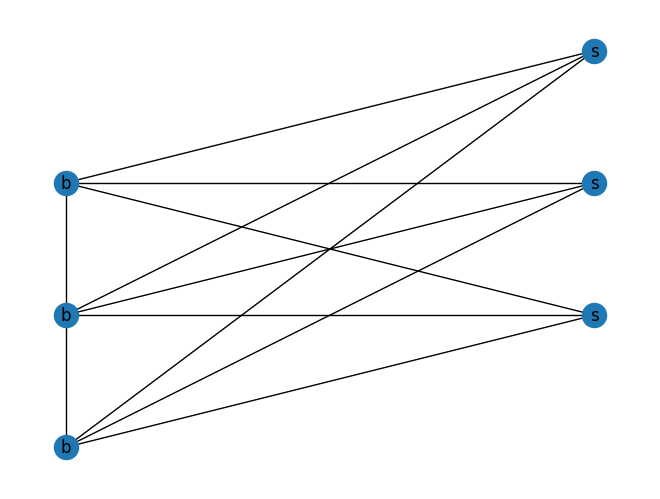

In [2]:
#Generating a 20x20 Fermi Hubbard model with a single band.  The ratio between Tunneling and Coulomb parameters can be swept to search for the appropriate mean electron filling.
n_s = 3
n_b = 2
g_dicke = generate_dicke_model_nx(
    n_s=n_s,
    n_b=n_b
)

creation = bosonic_creation_operator(n_b)
annihilation = bosonic_annihilation_operator(n_b)
number = bosonic_number_operator(n_b)
H_dicke = dicke_model_qubit_hamiltonian(
    n_s = n_s,
    n_b = n_b,
    omega_c = 1,
    omega_o = 1,
    lam = 1
)
H_tavis_cummings = tavis_cummings_model_qubit_hamiltonian(
    n_s = n_s,
    n_b = n_b,
    omega_c = 1,
    omega_o = 1,
    lam = 1
)
print('creation:')
print(creation)
print()
print('annihilation:')
print(annihilation)
print()
print('number:')
print(number)
print()
print('Dicke Hamiltonian')
print(H_dicke)
print()
print('Tavis-Cummings Hamiltonian')
print(H_tavis_cummings)
#print(g_dicke.nodes)
#print(g_dicke.edges)
pos = get_node_attributes(g_dicke, 'pos')
labels = get_node_attributes(g_dicke, 'label')
draw(g_dicke, pos=pos, labels=labels, with_labels=True)
#n = 20
#tunneling = 1
#coulomb = 8
#ham_one_band = of.fermi_hubbard(n, n, tunneling=tunneling, coulomb=coulomb, periodic=False) #returns an aperiodic fermionic hamiltonian

## Dicke Model Ground State Energy Computations

Now that we have the Hamiltonian generated, we need to generate an initial state with non-vanishing overlap with the ground state (or the low energy subspace).  This can reasonably be achieved by using mean field methods like Hartree-Fock.  This is an advantageous approach since Hartree-Fock will generate a product state, which should be easily prepared using local operations.  We are currently looking for a good implementation, so we do not currently have this portion incorporated into this notebook, but it will hopefully be implemented in the coming weeks.

In [3]:
#TODO: Incorporate Hartree-Fock into this section to prepare the initial state for QPE for GSEE.
#This should provide a low depth initialization circuit relative to the depth of the QPE, while giving access to a low-energy subspace

Once the initial state has been prepared, we can now perform Quantum Phase Estimation to estimate the ground state energy.  Currently we are using a short evolution time and a second order trotterization with a single step.  We use scaling arguments to determine the final resources since generating the full circuit for a large number of trotter steps with many bits of precision is quite costly.  The circuit depth scales linearly with the number of trotter steps and exponentially base 2 for the number of bits of precision.  This means that all of the resource estimates will be rather large.  It should be noted that more recently, there has been an implementation released in pyLIQTR for using Quantum Phase Estimation with Quantum Signal Processing as a sub-process.  Whether this can yield an improvement in resource requirements has yet to be explored. We would like to find results with a precision on the order of $10^{-3}$, so we are using 10 bits of precision.

In [4]:
name = 'DickeModel'

#defining parameters
n_s = 10 #using 10 instead of 100 for runtime
n_b = 10 #using 10 instead of 100 for runtime
omega_c = 1.3
omega_o = 1 #offset that won't affect ground state
lam = 1.5
h_bar = 1

ham_dicke = dicke_model_qubit_hamiltonian(
    n_s = n_s,
    n_b = n_b,
    omega_c = omega_c,
    omega_o = omega_o,
    lam = lam
)
trotter_order_dicke = 2
trotter_steps_dicke = 1

#this scales the circuit depth proportional to 2 ^ bits_precision
bits_precision_dicke = 10

#This determines if we want to extrapolate our RE or want to calculate it explicitly
extrapolate = True

E_min_dicke = -len(ham_dicke.terms)
E_max_dicke = 0
dicke_omega = E_max_dicke-E_min_dicke
t_dicke = 2*np.pi/dicke_omega
dicke_phase_offset = E_max_dicke*t_dicke

args_dicke = {
    'trotterize' : True,
    'mol_ham'    : ham_dicke,
    'ev_time'    : t_dicke,
    'trot_ord'   : trotter_order_dicke,
    'trot_num'   : 1 #handling adjustment in resource estimate to save time - scales circuit depth linearly.
}


init_state_dicke = [0] * (n_b + n_s + 1) #TODO: use Fock state from Hartree-Fock as initial state

print('starting')
total_value = 0
repetitions = 1
value_per_circuit=total_value / repetitions


dicke_metadata = GSEEMetaData(
        id=time.time_ns(),
        name=name,
        category='scientific',
        size=f'{n_b} + 1 + {n_s}',
        task='Ground State Energy Estimation',
        value_per_circuit=value_per_circuit,
        repetitions_per_application=repetitions,

        evolution_time=t_dicke,
        trotter_order = trotter_order_dicke,
        is_extrapolated=extrapolate,
        bits_precision = bits_precision_dicke,
        nsteps=trotter_steps_dicke,
    )

starting


Now we need to convert the GSEE circuit to Clifford + T and write the data to a file

In [5]:
print('Estimating Dicke')
t0 = time.perf_counter()

estimate = gsee_resource_estimation(
        outdir='GSE/DickeModel/',
        nsteps=trotter_steps_dicke,
        gsee_args=args_dicke,
        init_state=init_state_dicke,
        precision_order=1, #actual precision bits accounted as scaling factors in the resource estimate
        phase_offset=dicke_phase_offset,
        bits_precision=bits_precision_dicke,
        circuit_name=name,
        metadata = dicke_metadata,
        write_circuits=True
    )
t1 = time.perf_counter()
print(f'Time to estimate dicke: {t1-t0}')

Estimating Dicke
Time to generate circuit for GSEE: 0.00022629095474258065 seconds
   Time to decompose high level HPowGate circuit: 0.0007019999902695417 seconds 
   Time to transform decomposed HPowGate circuit to Clifford+T: 0.0005076670204289258 seconds
   Time to decompose high level IdentityGate circuit: 1.4999997802078724e-05 seconds 
   Time to transform decomposed IdentityGate circuit to Clifford+T: 8.875038474798203e-06 seconds
   Time to decompose high level PhaseOffset circuit: 8.595798863098025e-05 seconds 
   Time to transform decomposed PhaseOffset circuit to Clifford+T: 0.00010587502038106322 seconds
   Time to decompose high level Trotter_Unitary circuit: 0.5343438750132918 seconds 
   Time to transform decomposed Trotter_Unitary circuit to Clifford+T: 3.6690024160197936 seconds
   Time to decompose high level MeasurementGate circuit: 0.0013707500183954835 seconds 
   Time to transform decomposed MeasurementGate circuit to Clifford+T: 5.0333968829363585e-05 seconds
Tim

## Tavis-Cummings Model Ground State Energy Computations

Now that we have the Hamiltonian generated, we need to generate an initial state with non-vanishing overlap with the ground state (or the low energy subspace).  This can reasonably be achieved by using mean field methods like Hartree-Fock.  This is an advantageous approach since Hartree-Fock will generate a product state, which should be easily prepared using local operations.  We are currently looking for a good implementation, so we do not currently have this portion incorporated into this notebook, but it will hopefully be implemented in the coming weeks.

In [6]:
#TODO: Incorporate Hartree-Fock into this section to prepare the initial state for QPE for GSEE.
#This should provide a low depth initialization circuit relative to the depth of the QPE, while giving access to a low-energy subspace

Once the initial state has been prepared, we can now perform Quantum Phase Estimation to estimate the ground state energy.  Currently we are using a short evolution time and a second order trotterization with a single step.  We use scaling arguments to determine the final resources since generating the full circuit for a large number of trotter steps with many bits of precision is quite costly.  The circuit depth scales linearly with the number of trotter steps and exponentially base 2 for the number of bits of precision.  This means that all of the resource estimates will be rather large.  It should be noted that more recently, there has been an implementation released in pyLIQTR for using Quantum Phase Estimation with Quantum Signal Processing as a sub-process.  Whether this can yield an improvement in resource requirements has yet to be explored. We would like to find results with a precision on the order of $10^{-3}$, so we are using 10 bits of precision.

In [7]:
name='TavisCummingsModel'

#defining parameters
n_s = 10 #using 10 instead of 100 for runtime
n_b = 10 #using 10 instead of 100 for runtime
omega_c = 1.3
omega_o = 1 #offset that won't affect ground state
lam = 1.5
h_bar = 1

ham_tavis_cummings = tavis_cummings_model_qubit_hamiltonian(n_s = n_s, n_b = n_b, omega_c = omega_c, omega_o = omega_o, lam = lam)
trotter_order_tavis_cummings = 2
trotter_steps_tavis_cummings = 1

#this scales the circuit depth proportional to 2 ^ bits_precision
bits_precision_tavis_cummings = 10

#This determines if we want to extrapolate our RE or want to calculate it explicitly
extrapolate = True

E_min_tavis_cummings = -len(ham_tavis_cummings.terms)
E_max_tavis_cummings = 0
tavis_cummings_omega = E_max_tavis_cummings-E_min_tavis_cummings
t_tavis_cummings = 2*np.pi/tavis_cummings_omega
tavis_cummings_phase_offset = E_max_tavis_cummings*t_tavis_cummings

args_tavis_cummings = {
    'trotterize' : True,
    'mol_ham'    : ham_tavis_cummings,
    'ev_time'    : t_tavis_cummings,
    'trot_ord'   : trotter_order_tavis_cummings,
    'trot_num'   : 1 #handling adjustment in resource estimate to save time - scales circuit depth linearly.
}


init_state_tavis_cummings = [0] * (n_b + n_s + 1) #TODO: use Fock state from Hartree-Fock as initial state


tavis_cummings_metadata = GSEEMetaData(
    id=time.time_ns(),
    name=name,
    category='scientific',
    size=f'{n_b} + 1 + {n_s}',
    task='Ground State Energy Estimation',
    value_per_circuit=value_per_circuit,
    repetitions_per_application=repetitions,

    
    evolution_time=t_tavis_cummings,
    trotter_order = trotter_order_tavis_cummings,
    is_extrapolated=extrapolate,
    bits_precision = bits_precision_tavis_cummings,
    nsteps=trotter_steps_tavis_cummings,
)

Now we need to convert the GSEE circuit to Clifford + T and write the data to a file

In [8]:
print('Estimating tavis_cummings')
t0 = time.perf_counter()

estimate = gsee_resource_estimation(
    outdir='GSE/TavisCummings/',
    nsteps=trotter_steps_tavis_cummings,
    gsee_args=args_tavis_cummings,
    init_state=init_state_tavis_cummings,
    precision_order=1, #actual precision bits accounted as scaling factors in the resource estimate
    phase_offset=tavis_cummings_phase_offset,
    bits_precision=bits_precision_tavis_cummings,
    circuit_name=name,
    metadata = tavis_cummings_metadata,
    write_circuits=True
    )
t1 = time.perf_counter()
print(f'Time to estimate tavis_cummings: {t1-t0}')

Estimating tavis_cummings
Time to generate circuit for GSEE: 4.600000102072954e-05 seconds
   Time to decompose high level HPowGate circuit: 0.00013637501979246736 seconds 
   Time to transform decomposed HPowGate circuit to Clifford+T: 0.00018408300820738077 seconds
   Time to decompose high level IdentityGate circuit: 1.4625024050474167e-05 seconds 
   Time to transform decomposed IdentityGate circuit to Clifford+T: 4.708010237663984e-06 seconds
   Time to decompose high level PhaseOffset circuit: 8.475000504404306e-05 seconds 
   Time to transform decomposed PhaseOffset circuit to Clifford+T: 8.1458012573421e-05 seconds
   Time to decompose high level Trotter_Unitary circuit: 0.8101094159646891 seconds 
   Time to transform decomposed Trotter_Unitary circuit to Clifford+T: 4.786060957994778 seconds
   Time to decompose high level MeasurementGate circuit: 0.002639999962411821 seconds 
   Time to transform decomposed MeasurementGate circuit to Clifford+T: 6.304198177531362e-05 seconds